In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
file_list = os.listdir("/works/Data/Dacon/health_data_clf/")
file_list = [file for file in file_list if file.endswith(".csv")]
print(file_list)

['train_labels.csv', 'test_features.csv', 'train_features.csv', 'sample_submission.csv']


In [3]:
file_path = "/works/Data/Dacon/health_data_clf/"
train_label = pd.read_csv(file_path + file_list[0])
test_features = pd.read_csv(file_path + file_list[1])
train_features = pd.read_csv(file_path + file_list[2])
sample_submissuib = pd.read_csv(file_path + file_list[3])

print(train_label.shape)
print(test_features.shape)
print(train_features.shape)

(3125, 3)
(469200, 8)
(1875000, 8)


In [4]:
train_features.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


# Make feature using static

In [5]:
input_set = []
target_set = []
for id_idx in range(train_features.id.min(), train_features.id.max()+1):
    #Chack empty id
    if train_features[train_features.id==id_idx].shape[0]==0:
        continue
    
    sample_set_by_id = train_features[train_features.id==id_idx]
    
    #Caculate Mean value
    mx = sample_set_by_id.acc_x.mean()
    my = sample_set_by_id.acc_y.mean()
    mz = sample_set_by_id.acc_z.mean()
    
    #Caculate ABS Mean value
    mx_abs = abs(sample_set_by_id.acc_x).mean()
    my_abs = abs(sample_set_by_id.acc_y).mean()
    mz_abs = abs(sample_set_by_id.acc_z).mean()
    
    #Caculate STD Value
    sx = sample_set_by_id.acc_x.std()
    sy = sample_set_by_id.acc_y.std()
    sz = sample_set_by_id.acc_z.std()
    
    #Caculate Cov value
    cxy = np.cov(sample_set_by_id[["acc_x","acc_y"]].values.T)[0][1]
    cyz = np.cov(sample_set_by_id[["acc_y","acc_z"]].values.T)[0][1]
    czx = np.cov(sample_set_by_id[["acc_z","acc_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy = cxy/(sx*sy)
    ryz = cyz/(sy*sz)
    rzx = czx/(sz*sx)
    
    input_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, cxy, cyz, czx, rxy, ryz, rzx])
    
    #Append Label
    target_set.append(train_label[train_label.id == id_idx].label.values[0])


In [6]:
input_set = np.array(input_set)
target_set = np.array(target_set)

print(input_set.shape, target_set.shape)

(3125, 15) (3125,)


In [16]:
input_set[target_set==0][:,0]

array([-0.55152333, -0.49325187,  0.58195361, -0.30978429, -0.62335888,
       -0.16895702, -0.0480372 ,  0.03718879,  0.18230446, -0.22651788,
       -0.97684241, -0.30819624])

# Ploting x Mean value by Label

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

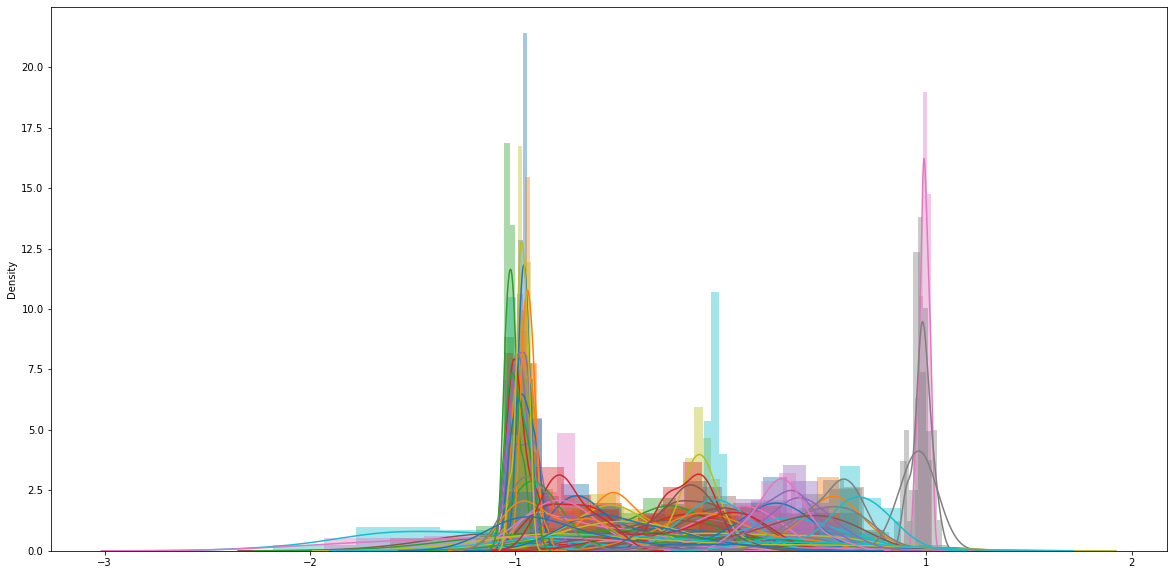

In [23]:
import seaborn as sns
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for id_idx in range(target_set.min(), target_set.max()+1):
    mean_values = input_set[target_set==id_idx][:,0]
    sns.distplot(mean_values, ax = ax)
plt.show()

# Ploting x STD value by label

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your cod

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

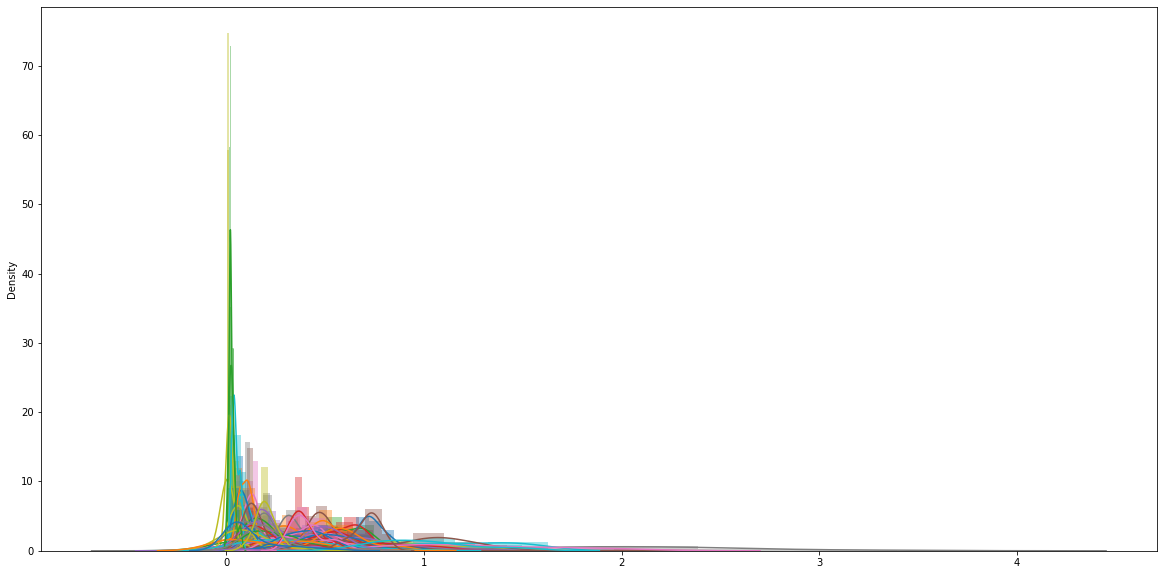

In [24]:
import seaborn as sns
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for id_idx in range(target_set.min(), target_set.max()+1):
    mean_values = input_set[target_set==id_idx][:,6]
    sns.distplot(mean_values, ax = ax)
plt.show()

# Correlation analysis

In [25]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

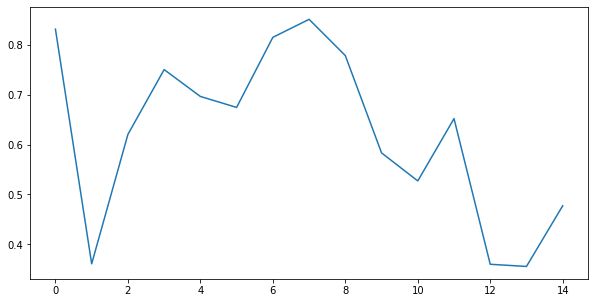

In [28]:
feature_idx = []
etas = []
for i in range(15):
    eta = correlation_ratio(categories=target_set, measurements=input_set[:,i])
    feature_idx.append(i)
    etas.append(eta)

plt.figure(figsize=(10,5))
plt.plot(feature_idx, etas)
plt.show()

0,6,7,8 Feature들 카테고리(Label)별로 분포의 차이가 존재하는 듯 한다.

1. 평균 -> 운동 방향성
2. 표준편차 및 에너지 -> 동장의 변화량
3. 공분산 및 상관계수 -> 축운동에 대한 정보

# What if Gyro sensor

In [29]:
input_gy_set = []
target_gy_set = []
for id_idx in range(train_features.id.min(), train_features.id.max()+1):
    #Chack empty id
    if train_features[train_features.id==id_idx].shape[0]==0:
        continue
    
    sample_set_by_id = train_features[train_features.id==id_idx]
    
    #Caculate Mean value
    mx = sample_set_by_id.gy_x.mean()
    my = sample_set_by_id.gy_y.mean()
    mz = sample_set_by_id.gy_z.mean()
    
    #Caculate ABS Mean value
    mx_abs = abs(sample_set_by_id.gy_x).mean()
    my_abs = abs(sample_set_by_id.gy_y).mean()
    mz_abs = abs(sample_set_by_id.gy_z).mean()
    
    #Caculate STD Value
    sx = sample_set_by_id.gy_x.std()
    sy = sample_set_by_id.gy_y.std()
    sz = sample_set_by_id.gy_z.std()
    
    #Caculate Cov value
    cxy = np.cov(sample_set_by_id[["gy_x","gy_y"]].values.T)[0][1]
    cyz = np.cov(sample_set_by_id[["gy_y","gy_z"]].values.T)[0][1]
    czx = np.cov(sample_set_by_id[["gy_z","gy_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy = cxy/(sx*sy)
    ryz = cyz/(sy*sz)
    rzx = czx/(sz*sx)
    
    input_gy_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, cxy, cyz, czx, rxy, ryz, rzx])
    
    #Append Label
    target_gy_set.append(train_label[train_label.id == id_idx].label.values[0])


In [32]:
input_gy_set = np.array(input_gy_set)
target_gy_set = np.array(target_gy_set)

print(input_gy_set.shape, target_gy_set.shape)

(3125, 15) (3125,)


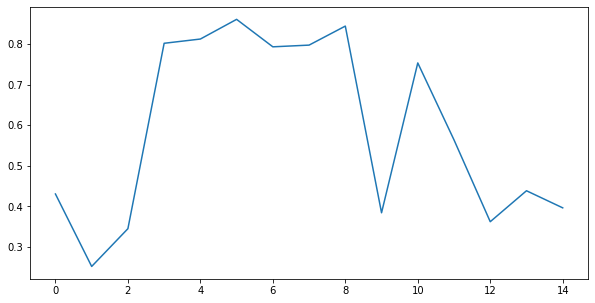

In [33]:
feature_idx = []
etas = []
for i in range(15):
    eta = correlation_ratio(categories=target_gy_set, measurements=input_gy_set[:,i])
    feature_idx.append(i)
    etas.append(eta)

plt.figure(figsize=(10,5))
plt.plot(feature_idx, etas)
plt.show()